# **Introduction to ML [using JAX]**


<a href="#" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024, Khipu 2025. Apache License 2.0.

**Authors:** Kale-ab Tessera, Geraud Nangue Tasse, Oluwabamigbe Oni

**Reviewers:** Doudou BA, Omayma Mahjoub, Elizabeth Ondula, Leonard Hinckeldey

**Adapted for Khipu:** José Lezama, ...

**Introduction:**

In this tutorial, we will learn about some of the high-level concepts behind machine learning (ML) and the basics of JAX, a numerical computing library that we will use for our practicals. Finally, we will learn about the fundamentals of supervised learning, from linear regression, all the way to neural networks, learning the fundamentals of optimisation along the way.

**Topics:**

Content: <font color='green'>`Numerical Computing`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

- Learn high-level concepts in ML - data, models and learning.
- Get a high-level overview of modern ML terminology.   
- Learn the basics of JAX and how to use it.
- Learn about linear regression and neural networks, and how to implement them in JAX.

**Prerequisites:**

- Basic knowledge of [NumPy](https://github.com/numpy/numpy).
- Basic knowledge of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).




# **Part 1 - What is Machine Learning?** 🤔 - 20 minutes ⏰

### 🤔 What Exactly *Is* Machine Learning?

**Machine learning (ML)** is about creating algorithms that learn patterns from data to make predictions or decisions.  Instead of writing explicit rules, we let the computer figure out the rules itself by showing it examples. It's like teaching a child by showing them, not by writing down a detailed rulebook!

Think of it like this:  **ML is programming computers to learn from data.**

There are three key ingredients in any ML problem:

## 🔑 **The Three Key Ingredients of Machine Learning**

Every machine learning task, no matter how complex, boils down to these three components:

1.  **📊 Data:** The examples we use to teach the computer.  This could be images, text, numbers, audio – anything we can represent digitally.
2.  **🧠 Models:**  The computer's "brain" – a function that takes in data and makes predictions. Models have adjustable **parameters** (like knobs) that we tune to make them better at the task.
3.  ** 🎓 Learning:** The process of tuning the model's parameters to improve its predictions. We use algorithms to adjust the parameters based on how well the model is doing on the data.

### 1.1 📊 Data: The Fuel for Learning

Machine learning models are hungry for data!  Data comes in many forms, and for computers to understand it, we need to represent it numerically.  Think of data as numbers in lists (**vectors**) or tables (**matrices**).

**Example: Images as Numbers**

An image can be represented as a grid of numbers, where each number represents the color or brightness of a pixel. For grayscale images like handwritten digits:

*   0 = Black
*   255 = White
*   Numbers in between = Shades of gray

**Inputs (Features) and Labels (Targets):**

In **supervised learning** (the type we'll focus on), we use *labeled* data. This means each piece of data has two parts:

1.  **Input (Features) - `x`**: The information we feed into the model to make a prediction (e.g., the pixel values of a digit image).
2.  **Label (Target) - `y`**: The correct answer or outcome we want the model to predict (e.g., the actual digit 7).

Each input-label pair is called a **sample**, and a collection of samples is a **dataset**.

Let's visualize a sample from a classic digit dataset to see how images are represented as numbers:

Loading MNIST dataset...

Dataset shape (examples, features): (70000, 784)
Number of examples: 70000
Number of features per image: 784 (28*28 pixels)
Example labels: [0 1 2 3 4 5 6 7 8 9]


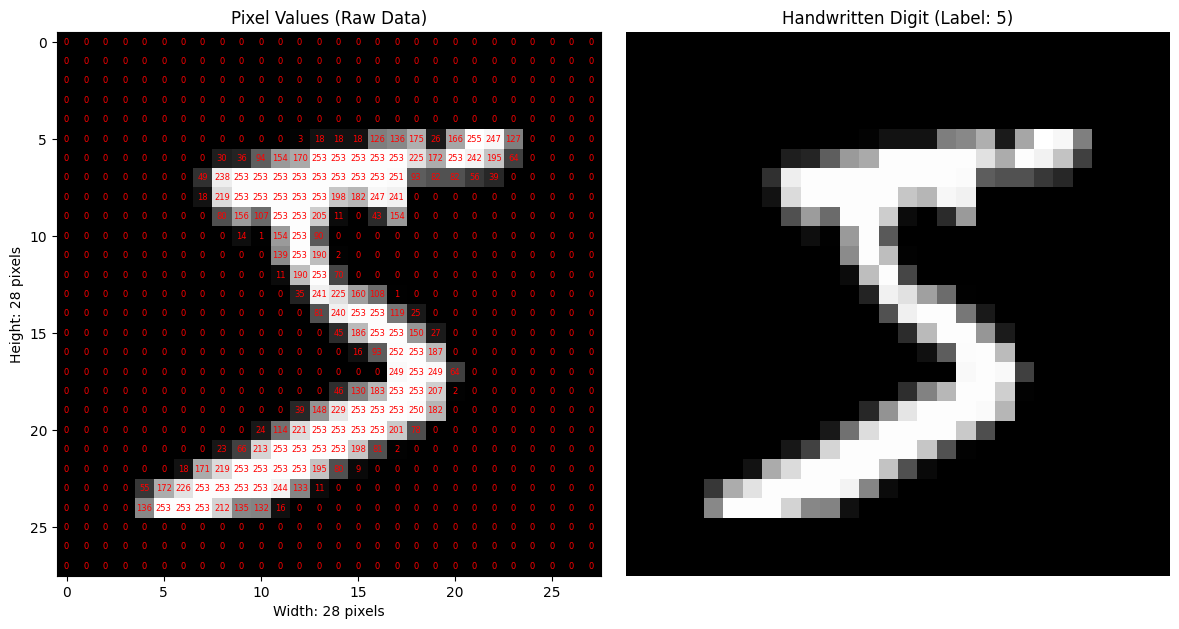

In [ ]:
## Hide code.
# @title  Visualize a digit image and its pixel values (Run this cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset (if not already loaded)
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, data_home="~/scikit_learn_data")

X = np.array(X).astype(float) # Convert to NumPy array
y = np.array(y).astype(int)   # Ensure labels are integers

print(f"\nDataset shape (examples, features): {X.shape}")
print(f"Number of examples: {X.shape[0]}")
print(f"Number of features per image: {X.shape[1]} (28*28 pixels)")
print(f"Example labels: {np.unique(y)}")

example_index = 0 # Let's look at the first image
example_image = X[example_index].reshape(28, 28) # Reshape flattened vector to 28x28 image
example_label = y[example_index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display raw pixel values as an image
ax1.imshow(example_image, cmap='gray')
ax1.set_title("Pixel Values (Raw Data)")
for i in range(28):
    for j in range(28):
        ax1.text(j, i, f'{int(example_image[i, j])}', ha='center', va='center', color='red', fontsize=6) # Show pixel values
ax1.set_xlabel("Width: 28 pixels")
ax1.set_ylabel("Height: 28 pixels")

# Display the image with a title
ax2.imshow(example_image, cmap='gray')
ax2.set_title(f"Handwritten Digit (Label: {example_label})")
ax2.axis('off') # Hide axes ticks and labels

plt.tight_layout()
plt.show()

**Splitting Data: Training and Testing**

To properly train and evaluate ML models, we split our dataset into two key parts:

1.  **Training Set (80%):**  Used to *train* the ML model (the computer learns from this data).
2.  **Testing Set (20%):**  Used to *evaluate* how well the trained model performs on *new, unseen* data. This tells us if the model has learned to generalize or just memorized the training data.

Let's split our MNIST data:

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

print("\nDataset split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape:  {X_test.shape}")


Dataset split:
Training set shape: (56000, 784)
Testing set shape:  (14000, 784)


**Data Quality Matters!**

Keep in mind that the quality and size of your data are crucial for good ML models. Noisy, incomplete, or biased data can lead to poor performance.  More data often helps models learn better patterns!

## 1.2 🧠 Models: The "Brain" of ML

Models are the core of machine learning.  A **model** is essentially a function, \(f(x)\), that takes input data \(x\) and transforms it into a useful output, the prediction \(y\).

For digit recognition:

*   **Input (x):** Image of a digit
*   **Model (f):**  The ML algorithm (e.g., a Neural Network)
*   **Output (y):** Predicted digit (0, 1, 2, ..., 9)

Models have **parameters** ($\theta$) – adjustable values that control how the model behaves.  Learning is all about finding the best parameters!

## 1.3 🎓 Learning: Tuning the Model's Knobs

**Learning** is the process of finding the best parameters ($\theta$) for our model so it makes accurate predictions. We do this by:

1.  **Defining a Loss Function:**  A **loss function**, \(L\), measures how "wrong" our model's predictions are compared to the true labels. It quantifies the error.
2.  **Using a Learning Algorithm:**  A **learning algorithm** (like Gradient Descent) adjusts the model's parameters to *minimize* the loss function. Think of it as tuning knobs to reduce the error signal.

**Analogy: Tuning a Radio**

Imagine tuning a radio to get a clear signal:

*   **Data:** The radio waves carrying the music signal.
*   **Model:** The radio receiver (circuitry with adjustable knobs).
*   **Parameters:** The tuning knobs on the radio.
*   **Loss Function:** The static noise you hear (we want to minimize noise).
*   **Learning Algorithm:** Your hand turning the tuning knob to find the clearest signal (minimize the static/loss).

**Generalization: Learning to Predict the Unknown**

The ultimate goal is **generalization** – for our model to make accurate predictions on *new, unseen data*, not just the data it was trained on. We'll discuss this more later!

**Exercise 1.2:**  Machine Learning's Core Idea - Which one is it?

*(Discuss with your neighbor!)*

**a)** Writing complex algorithms to solve specific problems.

**b)** Manually programming rules for every possible scenario.

**c)** Allowing computers to learn from data without being explicitly programmed.

**d)** Developing AI that can mimic human thought processes.

In [ ]:
selection = "a"  # @param ["a", "b", "c", "d"]
print(f"You selected: {selection}")

correct_answer = "c"
if selection != correct_answer:
  print("Incorrect answer, the correct answer is C. ML is about computers learning from data, not manual programming!")
else:
  print("Correct! 🎉 Machine learning is all about learning from data.")

## **1.4 Types of machine learning problems**

ML is a broad field! Let's quickly look at the main types of ML problems:

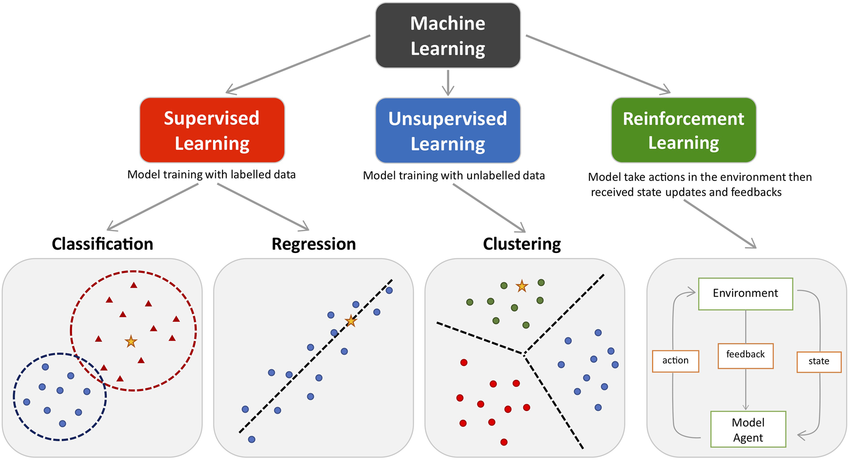

[Image Source](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Supervised Learning:** *In supervised learning, the algorithm is trained on a labelled dataset, where each input data point is paired with the correct output (label).* The goal is to learn a mapping from inputs to outputs based on the training data. Once trained, the model can make accurate predictions on new, unseen data. This approach is commonly used for tasks like classification and regression, where the correct answers are known during training.

**Unsupervised Learning:** *In unsupervised learning, the algorithm works with an unlabeled dataset, meaning the data has no predefined labels or outcomes.* The objective is to model the data distribution or discover patterns, structures, or relationships within the data. This might involve grouping similar data points (clustering) or reducing the dimensionality of the data to uncover hidden patterns. Unsupervised learning is often used in exploratory data analysis and for finding natural groupings in data.

**Reinforcement Learning:** *In reinforcement learning, the algorithm learns to make decisions by interacting with an environment.* The learner, known as the *agent*, takes actions and receives feedback in the form of rewards or penalties. The goal is to learn a strategy, or *policy*, that maximizes the cumulative reward over time. Reinforcement learning is commonly applied in areas like robotics, game playing, and autonomous systems, where an agent must learn to navigate complex environments.

**1. Supervised Learning:**
*   **Labeled Data:** We have input data (`x`) and corresponding correct outputs (`y`).
*   **Goal:** Learn a mapping from `x` to `y`.
*   **Examples:**
    *   **Classification:** Predicting categories (e.g., cat vs. dog, digit recognition).
    *   **Regression:** Predicting continuous values (e.g., house prices, weather forecasting).

**2. Unsupervised Learning:**
*   **Unlabeled Data:** We only have input data (`x`) without labels.
*   **Goal:** Find patterns, structure, or groupings within the data.
*   **Examples:**
    *   **Clustering:** Grouping similar movie reviews together.
    *   **Dimensionality Reduction:** Discovering hidden patterns in data.

**3. Reinforcement Learning:**
*   **Interactive Learning:** An agent learns by interacting with an environment.
*   **Feedback:** Agent receives rewards or penalties for its actions.
*   **Goal:** Learn a policy (strategy) to maximize cumulative rewards.
*   **Examples:**
    *   **Robotics:** Teaching a robot to walk.
    *   **Game Playing:** Training a computer to play chess or video games.

**Exercise 1.3:** Classify these ML tasks. Discuss with your neighbors.

  - Teaching a robot how to walk.
  - Weather prediction.
  - Spam email classification.
  - Teach a computer how to play chess.
  - Grouping together different kinds of movie reviews.

In [ ]:
# @title Solution - Exercise 1.3 (Click to expand)
print("Teaching a robot how to walk: Reinforcement Learning")
print("Weather prediction: Supervised Learning (Regression)")
print("Spam email classification: Supervised Learning (Classification)")
print("Teach a computer how to play chess: Reinforcement Learning")
print("Grouping movie reviews: Unsupervised Learning (Clustering)")

## 1.5 🚀 Modern ML Buzzwords (Briefly!)

ML is a fast-moving field! Here are a few modern terms you might hear:

<details>
  <summary>Click to Expand: Modern ML Terminology</summary>
  
  *   **Deep Learning:** Machine learning with deep **neural networks** (models with many layers). Great for complex data like images and text. We'll explore these soon!
  *   **Self-Supervised Learning:**  Learning from *unlabeled* data by creating your own labels!  For example, predict a missing part of an image or the next word in a sentence. Very useful when labeled data is scarce.
  *   **Generative Models:** Models that learn to *generate* new data, like images, text, or music. Examples include:
      *   **Large Language Models (LLMs):** (GPT-3, etc.) - Generate human-quality text. Powered by **Transformers** and **Autoregressive Models** (predicting the next word).
      *   **Diffusion Models:** (DALL-E, Imagen) - Generate stunningly realistic images by learning to reverse a noising process.
  
  Don't worry if these terms are new to you now – you'll encounter them as you continue your ML journey!</details>

# 🎉 Congrats! You've completed Part 1! 🎉

You now have a high-level understanding of:

*   What Machine Learning is and why it's useful
*   The key components of ML: Data, Models, and Learning
*   Different types of ML problems (Supervised, Unsupervised, Reinforcement Learning)
*   Some modern ML buzzwords

In Part 2, we'll dive into JAX, the powerful framework we'll use to build and train ML models!

# **Part 2 - JAX Basics** - 40 minutes ⏰

Alright, let's dive into JAX! This section will equip you with the foundational JAX knowledge you'll need for the rest of the practicals. Think of JAX as NumPy's cooler, faster cousin, especially when it comes to machine learning.

**Why JAX?**

JAX is a powerful Python library that turbocharges numerical computation and machine learning.  It's like NumPy but with superpowers:

*   🚀 **Blazing Fast:**  JAX uses just-in-time (JIT) compilation to speed up your code, making it run much faster, especially on GPUs and TPUs. Say goodbye to slow loops!
*   💡 **Automatic Differentiation:**  JAX can automatically calculate gradients of your functions (using `jax.grad`). This is ESSENTIAL for training neural networks and other ML models, and JAX makes it super easy!
*   ✨ **Auto-vectorization & Parallelization:**  JAX can automatically vectorize and parallelize your code across multiple cores or devices (GPUs, TPUs) with minimal effort (using `jax.vmap` and `jax.pmap`).

We'll explore these superpowers in this section!

<details>
  <summary>Dive Deeper: What is JAX Under the Hood?</summary>
  <p>
      JAX achieves its magic by combining two key technologies:
      
      *   **Autograd:**  For automatic differentiation (calculating gradients).
      *   **XLA (Accelerated Linear Algebra):** For just-in-time compilation and efficient execution, especially on accelerators like GPUs and TPUs.
      
      These technologies allow JAX to perform numerical computations with incredible speed and flexibility. JAX encourages a **functional programming style**, where functions are pure and transformations are composable, leading to cleaner and more efficient code.
  </p>
  <p>
      While JAX is lower-level than libraries like PyTorch or TensorFlow, its simplicity and powerful primitives make it a favorite for research and for building custom ML systems. For building neural networks, JAX is often used with higher-level libraries like Flax or Haiku, which provide more structure and convenience.
  </p>
</details>

## 2.1 JAX ❤️ NumPy: A Happy Family (10 minutes)

Good news! If you already know NumPy, you're in great shape to learn JAX. JAX NumPy (`jax.numpy` or `jnp`) is very similar to NumPy. Most of the NumPy functions you're familiar with work the same way in JAX!

Let's explore the similarities and differences.

### Similarities ✅: NumPy Comfort in JAX [optional]

JAX NumPy aims to be a drop-in replacement for NumPy for many common operations. Let's see some examples:

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n**{title}**") # Markdown formatting for titles!
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Create arrays for use in examples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])


**Element-wise Addition**
NumPy: [5 7 9]
JAX:   [5 7 9]
----------------------------------------


#### ➕ Element-wise Addition: `+`



In [ ]:
np_add = np_array1 + np_array2
jax_add = jax_array1 + jax_array2
print_comparison("Element-wise Addition", np_add, jax_add)


**Element-wise Addition**
NumPy: [5 7 9]
JAX:   [5 7 9]
----------------------------------------


#### 🔪 Indexing and Slicing: `[]`

Accessing parts of an array using indices and slices is the same:

In [ ]:
np_slice = np_array1[1:4] # Get elements from index 1 up to (but not including) 4
jax_slice = jax_array1[1:4]
print_comparison("Array Slicing", np_slice, jax_slice)


**Array Slicing**
NumPy: [2 3]
JAX:   [2 3]
----------------------------------------


#### ➡️ Array Concatenation: `.concatenate`

Combining arrays is also familiar:

In [ ]:
np_concat = np.concatenate([np_array1, np_array2])
jax_concat = jnp.concatenate([jax_array1, jax_array2])
print_comparison("Array Concatenation", np_concat, jax_concat)


**Array Concatenation**
NumPy: [1 2 3 4 5 6]
JAX:   [1 2 3 4 5 6]
----------------------------------------


#### ✖️ Matrix Multiplication: `.dot`

Matrix multiplication works the same way for linear algebra operations:

In [ ]:
# Create matrices for example
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Matrix Multiplication", np_matmul, jax_matmul)


**Matrix Multiplication**
NumPy: [[ 7 10]
 [15 22]]
JAX:   [[ 7 10]
 [15 22]]
----------------------------------------


#### 🧮 Mathematical Operations: `.sin`, `.mean`, etc.

Many mathematical functions like `sin`, `cos`, `exp`, `mean`, `sum`, etc., are also available in JAX NumPy and behave similarly to their NumPy counterparts:

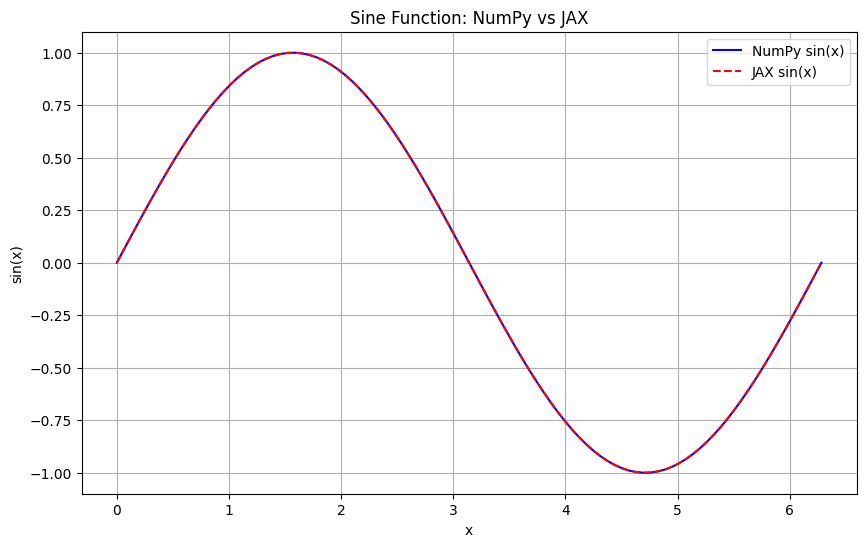

In [ ]:
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Calculate sine using NumPy
y_np = np.sin(x)

# Calculate sine using JAX
y_jax = jnp.sin(x)

# Plotting (same plotting code for both)
plt.figure(figsize=(10, 6))
plt.plot(x, y_np, label='NumPy sin(x)', color='blue')
plt.plot(x, y_jax, label='JAX sin(x)', color='red', linestyle='--')
plt.title('Sine Function: NumPy vs JAX')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

### Differences ❌: Where JAX and NumPy Diverge

While JAX NumPy is designed to be very similar to NumPy, there are some key differences you need to be aware of, especially when writing ML code.

#### 1. 🚫 Immutability: JAX Arrays Can't Be Changed in Place

Unlike NumPy arrays, JAX arrays are **immutable**. This means once you create a JAX array, you cannot modify its values directly.  Trying to change an element in-place will raise an error.

Let's see what happens when we try to change the first element of a NumPy array:

In [ ]:
# NumPy: Mutable Arrays (Changes are allowed)
x_np = np.arange(10)
print(f"Original NumPy array: {x_np}")

# Change the first element of x_np
x_np[0] = 10  # In-place modification - this works!
print(f"Modified NumPy array: {x_np}") # NumPy array is changed

Original NumPy array: [0 1 2 3 4 5 6 7 8 9]
Modified NumPy array: [10  1  2  3  4  5  6  7  8  9]


Now, let's try the same with a JAX array:

In [ ]:
# JAX: Immutable Arrays (Changes are NOT allowed)
try:
    x_jax = jnp.arange(10)
    print(f"Original JAX array: {x_jax}")
    x_jax[0] = 10  # In-place modification - this will cause an error!
except Exception as e:
    print(f"Error: {e}") # JAX array remains unchanged

Original JAX array: [0 1 2 3 4 5 6 7 8 9]
Error: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


See? It fails!  JAX throws an error because it doesn't allow in-place modifications.

**Updating JAX Arrays Immutably:**

To update JAX arrays, you use special "functional update" methods like `.at[index].set(value)`. These methods don't modify the original array; instead, they return a *new*, updated copy of the array.

In [ ]:
x_jax = jnp.arange(10)
print(f"Original JAX array:  {x_jax}")

new_x_jax = x_jax.at[0].set(10) # Creates a *new* array with the change
print(f"New JAX array (modified): {new_x_jax}") # 'new_x_jax' is modified
print(f"Original JAX array (unchanged): {x_jax}") # 'x_jax' is still the same

Original JAX array:  [0 1 2 3 4 5 6 7 8 9]
New JAX array (modified): [10  1  2  3  4  5  6  7  8  9]
Original JAX array (unchanged): [0 1 2 3 4 5 6 7 8 9]


**Key Takeaway:**  Remember to use functional updates like `.at[].set()` when you need to modify JAX arrays. Functional programming is a core principle in JAX and enables its powerful transformations.

#### 2. 🎲 Explicit Randomness: JAX Makes You Manage Randomness

JAX handles random number generation differently than NumPy. In JAX, randomness is **explicit**.  You need to manage random "keys" to control random number generation, making your code more reproducible and predictable.

Let's compare NumPy's implicit randomness to JAX's explicit approach.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# NumPy: Implicit Randomness (Global Seed)
np.random.seed(0) # Set seed globally
np_rand = np.random.rand(3) # Generate random numbers
print(f"NumPy Random: {np_rand}")

# JAX: Explicit Randomness (Using Keys)
key = random.PRNGKey(0) # Create a random key
jax_rand = random.uniform(key, (3,)) # Pass key to random function
print(f"JAX Random:   {jax_rand}")

NumPy Random: [0.5488135  0.71518937 0.60276338]
JAX Random:   [0.9653214  0.31468165 0.63302994]


**Explanation:**

*   **NumPy:** NumPy uses a global random number generator. You set the seed once using `np.random.seed()`, and subsequent calls to NumPy random functions will use that seed implicitly.
*   **JAX:** JAX uses explicit random keys. You create a key using `random.PRNGKey()` and then explicitly pass that key to each JAX random function (like `random.uniform`).

**Generating Multiple Sets of Random Numbers in JAX:**

If you need multiple sets of independent random numbers in JAX, you must **split** the key each time you need randomness. This ensures that each random operation gets a fresh, independent source of randomness.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# NumPy: Multiple Random Sets (Implicit - can be less reproducible in complex code)
np.random.seed(0)
np_rand_set1 = np.random.rand(3)
np_rand_set2 = np.random.rand(3)
print(f"NumPy Random Set 1: {np_rand_set1}")
print(f"NumPy Random Set 2: {np_rand_set2}")

# JAX: Multiple Random Sets (Explicit and Reproducible)
key = random.PRNGKey(0)

# Split the key to get two independent subkeys
key, subkey1 = random.split(key) # key is updated!
key, subkey2 = random.split(key) # key is updated again!

jax_rand_set1 = random.uniform(subkey1, (3,)) # Use subkey1
jax_rand_set2 = random.uniform(subkey2, (3,)) # Use subkey2

print(f"JAX Random Set 1:   {jax_rand_set1}")
print(f"JAX Random Set 2:   {jax_rand_set2}")

NumPy Random Set 1: [0.5488135  0.71518937 0.60276338]
NumPy Random Set 2: [0.54488318 0.4236548  0.64589411]
JAX Random Set 1:   [0.87241435 0.11105156 0.27708054]
JAX Random Set 2:   [0.47366    0.5662228  0.88060236]


**Key Takeaway:** JAX's explicit randomness with keys might seem a bit more verbose at first, but it's crucial for reproducibility, especially in complex ML experiments. It gives you fine-grained control over random number generation.

If you want to delve deeper into JAX's random number generation, check out the resources mentioned earlier or the [official JAX documentation on randomness](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html).

## 2.2 Core JAX Primitives: `jit` and `grad` (10 minutes)

Now, let's explore two of JAX's most powerful features (primitives): `jit` and `grad`. These are the building blocks for writing high-performance ML code in JAX.

### `jit` - Speed Boost with Just-In-Time Compilation 🚀

**`jax.jit`** (Just-In-Time compilation) is your secret weapon for making JAX code run FAST. It compiles and caches your Python functions, so they execute super-efficiently using XLA, especially on accelerators like GPUs and TPUs.

**How `jit` Works:**

`jit` takes your Python function and transforms it into a compiled version that's optimized for your hardware. The first time you run a jitted function, JAX compiles it (this might take a bit longer initially). But subsequent calls are much faster because JAX reuses the compiled version from the cache.

In [ ]:
import jax
import jax.numpy as jnp
import time

# Define a simple function
def matmul_sum(a, b):
    matmul =  jnp.matmul(a, b)
    sum = jnp.sum(matmul, axis=0)
    return sum

# JIT compile the function
fast_add = jax.jit(matmul_sum)

# Example arrays
N = 5
x = jnp.arange(N**2).reshape(N,N)
y = jnp.arange(N**2).reshape(N,N) + N**2

# --- Timing Comparison ---

print("--- Without JIT --- ")
start_time = time.time()
result_slow = matmul_sum(x, y)
end_time = time.time()
print(f"Result: {result_slow}")
print(f"Time taken (no jit): {end_time - start_time:.4f} seconds\n")

print("--- With JIT --- ")
result_fast = fast_add(x, y) # First call - compilation happens here

start_time = time.time()
result_fast = fast_add(x, y) # Subsequent calls are faster
end_time = time.time()
print(f"Result: {result_fast}")
print(f"Time taken (jit): {end_time - start_time:.4f} seconds")

--- Without JIT --- 
Result: [10750 11050 11350 11650 11950]
Time taken (no jit): 0.0011 seconds

--- With JIT --- 
Result: [10750 11050 11350 11650 11950]
Time taken (jit): 0.0001 seconds


**Observe the speed difference!** The jitted version runs much faster, especially on subsequent calls, thanks to compilation and caching.

**Important Note:**  `jit` works best with **pure functions**. Pure functions are functions that:

*   Always return the same output for the same inputs (no side effects).
*   Don't rely on or modify any external state outside their scope.

JAX functions are generally expected to be pure and functional for best performance and predictability.

### `grad` - Automatic Differentiation: Your ML Superpower ✨

**`jax.grad`** is the automatic differentiation (autodiff) workhorse in JAX. It lets you compute gradients of Python and NumPy functions with ease. Gradients are the heart of training ML models, and JAX makes calculating them a breeze!

**How `grad` Works:**

`grad(f)` takes a function `f` as input and returns a *new* function that computes the gradient of `f`. If `f` is a mathematical function \(f\), then `grad(f)` is like its derivative \(f'\). Calling `grad(f)(x)` gives you the gradient of \(f\) evaluated at point \(x\).

In [ ]:
import jax
import jax.numpy as jnp

# Define a function (e.g., square function)
def square(x):
    return x ** 2

# Get the gradient function using jax.grad
grad_square = jax.grad(square)

# Evaluate the gradient at x = 3.0
x = 3.0
gradient_at_x = grad_square(x)
print(f"Gradient of square(x) at x = {x}: {gradient_at_x}") # Should be close to 6.0

Gradient of square(x) at x = 3.0: 6.0


**Intuition:** Gradients tell you the direction of the steepest ascent of a function. In ML, we use gradients to find the direction to *minimize* our loss function (error). Gradient descent and related optimization algorithms use gradients to iteratively update model parameters and reduce loss.

**Key Takeaway:** `jax.grad` is incredibly powerful. It allows you to automatically compute gradients of even complex Python functions, which is essential for training neural networks without manual differentiation!

## 2.3 Auto-vectorization - `vmap` (Bonus - Optional, 5 minutes)

**`jax.vmap`** (Vectorizing Map) is another JAX superpower. It automatically vectorizes your functions, allowing you to efficiently apply a function to batches of data without writing explicit loops. This is crucial for performance in ML, where we often process data in batches.

**Example: Vectorizing the `square` function:**

In [ ]:
import jax
import jax.numpy as jnp

# Our simple square function (operates on a single number)
def square(x):
    return x ** 2

# Vectorize 'square' to work on batches using vmap
vectorized_square = jax.vmap(square) # Create a batched version

# Input batch of numbers
x_batch = jnp.array([1.0, 2.0, 3.0])

# Apply vectorized function to the batch
squared_batch = vectorized_square(x_batch)
print(f"Squared batch: {squared_batch}")

Squared batch: [1. 4. 9.]


**`vmap` Magic:** `vmap(square)` takes the `square` function (which works on single numbers) and automatically creates `vectorized_square`, which can now process entire batches (arrays) of numbers efficiently.

**Benefit:** Without `vmap`, you'd have to write explicit loops to process batches, which is slower and less concise. `vmap` does the looping (vectorization) for you under the hood, making your code cleaner and faster.

**Key Takeaway:** `jax.vmap` is your friend for efficient batch processing in JAX. It eliminates the need for manual loops and leverages JAX's performance optimizations.

### 🎉 Congratulations! You've Mastered JAX Basics!

You've now got a solid foundation in JAX, covering:

*   NumPy Compatibility
*   Immutability (and functional updates)
*   Explicit Randomness with Keys
*   `jit` for Speed
*   `grad` for Automatic Differentiation
*   `vmap` for Auto-vectorization (Bonus)

With these JAX primitives in your toolkit, you're well-prepared to tackle more advanced ML tasks in the following practicals. Let's move on to Part 3 to build and train your first neural network!

# **Part 3 - Basics of supervised ML (Regression and Classification)** - 40 minutes ⏰



Now that we know some basics of JAX, we can do some machine learning! We will start with some simple models (linear regression), then build our way up towards more complex models (neural networks). First, we need to grab some key ML concepts.

The curve below is a plot of some data generated using a Sine function. Most often in science, we have data collected through experiments and we want to find a function that explains the data. In general, we need to find a function that maps some inputs in some dimension to some outputs in another dimension.
The process of finding such a function also called a **model** is commonly referred to in various fields as **regression**.

In machine learning, this refers to finding a function that maps a set of numerical values called **features** to another set of numerical values called **labels or targets**.  If the function is linear, the process is referred to as **linear regression**.

## **3.1 Linear Regression: Predicting House Prices** - 20 minutes ⏰ - 📈 <font color="blue">Beginner</font>

Linear Regression is a simple yet powerful algorithm for **regression tasks**, where we aim to predict a continuous numerical value. Imagine predicting house prices based on their size - that's regression!

**What is Linear Regression?**

In Linear Regression, we assume a linear relationship between the **input features ($\mathbf{x}$)** and the **target variable ($\mathbf{y}$)**.  Our goal is to find the best-fitting line (or hyperplane in higher dimensions) that describes this relationship.

**Mathematical Model:**

We represent the linear regression model as:
$f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$
Where:
*   $f(\mathbf{x})$ is the predicted house price for a given house with features $\mathbf{x}$.
*   $\mathbf{x}$ is a vector of input features (e.g., house size, number of rooms).
*   $\mathbf{w}$ is a vector of **weights** (parameters that determine the slope of the line/hyperplane).
*   $b$ is the **bias** term (the y-intercept).

Think back to the equation of a line you learned in school: \(y = mx + c\).  In linear regression:

*   $\mathbf{w}$ is like the **slope** (\(m\))
*   $b$ is like the **y-intercept** (\(c\))

Our task is to learn the optimal values for $\mathbf{w}$ and $b$ from our data.

### 🏠 Toy Dataset: Predicting Housing Prices

Let's create a simple dataset of house sizes and their corresponding prices to illustrate linear regression.

| Size of House ($\mathbf{x}$) in $m^2$ | Price ($\mathbf{y}$) in 100,000s of $ |
|---|---|
| 210 | 4.0 |
| 160 | 3.3 |
| 240 | 3.7 |
| 140 | 2.3 |
| 300 | 5.4 |

Here's how we represent this data in JAX NumPy:

In [ ]:
import jax.numpy as jnp

# Input features (house sizes in square meters)
X = jnp.asarray([[210], [160], [240], [140], [300]])

# Target values (prices in 100,000s of dollars)
Y = jnp.asarray([[4], [3.3], [3.7], [2.3], [5.4]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # We still need numpy for plotting!

def plot_house_data(parameters_list=None, title="Housing Prices vs. Size", axis_pad=1):
    """Helper function to plot the housing data and linear regression lines."""
    xlim = [X.min() - axis_pad, X.max() + axis_pad] # Plot limits with padding
    ylim = [Y.min() - axis_pad, Y.max() + axis_pad]
    fig, ax = plt.subplots()

    if parameters_list:
        x_pred = np.linspace(xlim[0], xlim[1], 100) # Input range for plotting lines
        for params in parameters_list: # Plotting multiple lines (if provided)
            y_pred = params['b'] + params['w'] * x_pred # Linear model prediction
            ax.plot(x_pred, y_pred, ":", color=[1, 0.7, 0.6]) # Light dashed lines

        params = parameters_list[-1] # Last line is solid and red
        y_pred = params['b'] + params['w'] * x_pred
        ax.plot(x_pred, y_pred, "-", color='red', lw=2, label='Linear Regression Fit') # Solid red line

    ax.plot(X, Y, "ob", label='House Prices Data') # Plotting data points
    ax.set(xlabel="House Size (sq meters)", ylabel="Price (100,000s of $)",
           title=title, xlim=xlim, ylim=ylim) # Labels and title
    ax.grid(True) # Add grid for better readability
    ax.legend() # Show legend
    plt.show()

plot_house_data() # Show initial data points

Let's visualize our simple dataset. Each blue dot represents a house, with its size on the x-axis and price on the y-axis.

### 🎲 Building a Linear Regression Model (Randomly)

Let's start by creating a linear regression model with *randomly initialized* weights ($\mathbf{w}$) and bias (\(b\)). We'll use JAX's random number generation (remember Part 2!) to create these initial parameters.

In [ ]:
# Input feature dimension (house size only)
input_dim = 1

# Initialize random weights (w) and bias (b)
key = jax.random.PRNGKey(0) # Random key for reproducibility
w_key, b_key = jax.random.split(key) # Split key into two for weights and bias
w_initial = jax.random.uniform(w_key, (input_dim,)) # Random weight (shape: (1,))
b_initial = jax.random.uniform(b_key, (1,)) # Random bias (shape: (1,))

# Store parameters in a dictionary (more organized)
initial_params = {'w': w_initial, 'b': b_initial}

print("Initialized parameters:", initial_params)

# Example prediction for a house of size 210 sq meters
sample_house_size = X[:1] # First house size from our dataset
predicted_price = initial_params['b'] + initial_params['w'] * sample_house_size
print("\nPrediction for a house of size 210 sq meters:", predicted_price)

In the code above, we:

*   Set up the input dimension (1, because we only have house size as a feature).
*   Initialized random weights and bias using `jax.random.uniform` and a random key.
*   Stored the weights and bias in a Python dictionary called `initial_params` for better organization (we'll use dictionaries to manage parameters throughout).
*   Made a prediction for the first house in our dataset using these random parameters.

**Code Task:**

Now, extend this to predict prices for **all houses** in our dataset (the entire `X` array) using the `initial_params`. Complete the `linear_model` function below to perform this batched prediction.

In [ ]:
from typing import Dict, Any

def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
    """Applies linear regression model to a batch of inputs.

    Args:
        params: Dictionary containing model weights 'w' and bias 'b'.
        X: Input features array of shape (num_samples, num_features).

    Returns:
        Predictions array of shape (num_samples, 1).
    """
    w = params['w']
    b = ... # YOUR CODE HERE: Extract bias from params dictionary

    # YOUR CODE HERE: Compute predictions for all houses (matrix multiplication!)
    predictions = ...
    return predictions

In [ ]:
# @title Run this cell to test your `linear_model` function

def test_linear_model():
    test_predictions = linear_model(initial_params, X)
    expected_predictions = initial_params['b'] + initial_params['w'] * X # Correct calculation
    assert jnp.allclose(test_predictions, expected_predictions), "Predictions are not matching!"
    print("\n🎉 Great job! Your `linear_model` function is working correctly.")

test_linear_model()

In [ ]:
# @title Double-click for solution
def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
    """Applies linear regression model to a batch of inputs.

    Args:
        params: Dictionary containing model weights 'w' and bias 'b'.
        X: Input features array of shape (num_samples, num_features).

    Returns:
        Predictions array of shape (num_samples, 1).
    """
    w = params['w']
    b = params['b'] # Solution: Extract bias 'b'

    # Solution: Matrix multiplication for batched predictions
    predictions =  X @ w + b
    return predictions

### 📉 Loss Function: Measuring Prediction Error

To train our linear regression model, we need a way to measure how well it's performing. This is where the **loss function** comes in. The loss function quantifies the error between our model's predictions and the actual house prices.

For regression problems, a common and effective loss function is the **Mean Squared Error (MSE)**. It calculates the average of the squared differences between the predicted prices ($\hat{y}$) and the true prices (\(y\)).

$L(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$

Where:
*   $L(\mathbf{\theta})$ is the loss value (lower is better).
*   $\mathbf{\theta} = [\mathbf{w}, b]$ represents the model parameters (weights and bias).
*   $m$ is the number of houses in our dataset.
*   $y_i$ is the actual price of the i-th house.
*   $\hat{y}_i = f(\mathbf{x}_i) = \mathbf{w}^T \mathbf{x}_i + b$ is the predicted price by our linear regression model.

In [ ]:
def mean_squared_error_loss(params: Dict[str, jnp.ndarray],
                            X: jnp.ndarray,
                            y_true: jnp.ndarray) -> float:
    """Computes the mean squared error loss for linear regression.

    Args:
        params: Dictionary of model parameters (weights and bias).
        X: Input features array.
        y_true: True target values array.

    Returns:
        Mean squared error loss (scalar).
    """
    y_predicted = linear_model(params, X) # Model predictions
    loss = jnp.mean((y_true - y_predicted)**2) # Mean squared error calculation
    return loss

# Let's calculate the loss with our *initial random parameters*:
initial_loss = mean_squared_error_loss(initial_params, X, Y)
print(f"Initial Loss with random parameters: {initial_loss:.4f}")

The `mean_squared_error_loss` function calculates how bad our model is with the initial random parameters. A higher loss value means our model is making larger errors.

### 🚀 Optimization: Finding the Best Fit with Gradient Descent

Now, the core of machine learning: **optimization**!  Our goal is to find the parameters ($\mathbf{w}$ and $b$) that minimize the loss function, making our model's predictions as close as possible to the actual house prices.

We'll use **Gradient Descent**, a powerful iterative optimization algorithm. Gradient Descent works by:

1.  **Calculating Gradients:**  Computing the gradients of the loss function with respect to the model parameters ($\mathbf{w}$ and $b$). The gradient tells us the direction of the steepest *increase* in loss.
2.  **Updating Parameters:**  Adjusting the parameters in the *opposite* direction of the gradient (descent!) to reduce the loss. The **learning rate** ($\eta$) controls the step size of these adjustments.

This process is repeated iteratively until the loss function reaches a minimum (or close to it).

**Gradient Descent Update Rule:**

$\mathbf{\theta}_{new} = \mathbf{\theta}_{old} - \eta \nabla_{\mathbf{\theta}} L(\mathbf{\theta})$

Where:
*   $\mathbf{\theta}$ represents the model parameters (weights and bias).
*   $\eta$ is the **learning rate** (a hyperparameter we choose).
*   $\nabla_{\mathbf{\theta}} L(\mathbf{\theta})$ is the gradient of the loss function with respect to the parameters.

**JAX's Automatic Differentiation to the Rescue!**

Remember `jax.grad` from Part 2?  It's perfect for calculating these gradients automatically! We don't need to derive complex formulas by hand.

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np # Still using NumPy for data shuffling
import matplotlib.pyplot as plt
from typing import Dict, Any, Tuple

def train_linear_regression_gd(loss_fn, initial_params,
                                 X_train: jnp.ndarray, y_train: jnp.ndarray,
                                 learning_rate: float = 0.01, num_epochs: int = 100,
                                 batch_size: int = 5) -> Dict[str, jnp.ndarray]:
    """Trains a linear regression model using batch gradient descent in JAX.

    Args:
        loss_fn: Loss function to minimize.
        initial_params: Initial model parameters.
        X_train: Training features data.
        y_train: Training target values.
        learning_rate: Learning rate for gradient descent.
        num_epochs: Number of training epochs.
        batch_size: Batch size for mini-batch gradient descent.

    Returns:
        Learned model parameters.
    """
    params = initial_params # Start with initial parameters
    loss_values = [] # To track loss over training

    # Value and gradient function (using JAX's autodiff!)
    loss_and_grad_fn = jax.value_and_grad(loss_fn) # From previous section

    for epoch in range(num_epochs):
        # Shuffle data for each epoch (using NumPy for simplicity)
        num_samples = X_train.shape[0]
        indices = np.random.permutation(np.arange(num_samples))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        # Mini-batch gradient descent
        for start_index in range(0, num_samples, batch_size):
            end_index = min(start_index + batch_size, num_samples)
            X_batch = X_train_shuffled[start_index:end_index]
            y_batch = y_train_shuffled[start_index:end_index]

            # Compute loss and gradients using JAX autodiff
            loss_val, grads = loss_and_grad_fn(params, X_batch, y_batch)

            # Update parameters (gradient descent step!)
            params = jax.tree.map(lambda p, g: p - learning_rate * g, params, grads)  # notice jax.tree.map

        loss_values.append(loss_val) # Store loss for plotting

    # Plotting the loss curve (how loss changes over epochs)
    plt.plot(range(num_epochs), loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error Loss')
    plt.title('Training Loss Curve')
    plt.show()
    return params # Return learned parameters

# Train the model using gradient descent
learned_params = train_linear_regression_gd(
    loss_fn=mean_squared_error_loss, # Our MSE loss function
    initial_params=initial_params,   # Random initial parameters
    X_train=X,                       # Our housing price data
    y_train=Y,
    learning_rate=1e-5,            # Learning rate (hyperparameter)
    num_epochs=50,                  # Number of epochs (hyperparameter)
    batch_size=8                   # Batch size (hyperparameter)
)

print("\nLearned Parameters:", learned_params)

# Plot the data and the linear regression fit
plot_house_data(parameters_list=[initial_params, learned_params],
                 title="Linear Regression Fit to Housing Prices")

**Explanation of `train_linear_regression_gd` function:**

*   **`loss_and_grad_fn = jax.value_and_grad(loss_fn)`:**  This line is KEY! It uses `jax.value_and_grad` to create a function that efficiently computes both the loss value *and* its gradients with respect to the parameters.
*   **Training Loop:** The code then iterates for a specified number of epochs.
*   **Mini-Batching:**  Inside each epoch, it shuffles the training data and divides it into mini-batches. Mini-batch gradient descent is a common practice for faster and more stable training.
*   **Gradient Calculation and Parameter Update:** For each batch, it calculates the loss and gradients using `loss_and_grad_fn` and updates the model parameters using the gradient descent update rule: `params = jax.tree_map(lambda p, g: p - learning_rate * g, params, grads)`.
*   **Loss Tracking:** The training loss is recorded for each iteration to visualize the training progress.

**Observe the Results:**

*   **Loss Curve:** The plot shows how the loss function decreases over training iterations, indicating that our gradient descent optimization is working and the model is learning.
*   **Linear Regression Fit:** The red line in the scatter plot represents the linear regression model learned by gradient descent. It should now fit the housing price data much better than the initial random line (dashed lines).

**Exercise:** Experiment with Hyperparameters

Now it's your turn to play with the hyperparameters of the gradient descent algorithm.  Try changing:

*   **Learning Rate:**  Experiment with different learning rates (e.g., 0.1, 0.001, 0.0001). What happens if the learning rate is too high or too low?
*   **Number of Epochs:**  Train for more or fewer epochs. How does this affect the loss curve and the final fit?
*   **Batch Size:**  Try different batch sizes (e.g., 1, 10, 50). How does batch size influence the training process?

**Challenge:** Can you find hyperparameter settings that lead to even faster convergence (loss decreasing quickly) and a better fit to the data?

In [ ]:
# Experiment with hyperparameters here!

tuned_params = train_linear_regression_gd(
    loss_fn=mean_squared_error_loss,
    initial_params=initial_params,
    X_train=X,
    y_train=Y,
    learning_rate=1e-5,  # <--- Experiment with learning rate
    num_epochs=100,     # <--- Experiment with num_epochs
    batch_size=5        # <--- Experiment with batch_size
)

plot_house_data(parameters_list=[initial_params, learned_params, tuned_params],
                 title="Linear Regression Fit with Tuned Hyperparameters")

## **3.3 Logistic Regression: Classifying Digits** - 20 minutes ⏰ - 📈 <font color="yellow">Intermediate</font>

Welcome to Logistic Regression! In the previous section, we tackled **regression**, predicting continuous values like house prices. Now, we'll focus on **classification**, where we predict categories or classes. Our goal is to build a digit classifier for the MNIST dataset (from Part 1!).

**From Linear to Logistic Regression:**

Linear Regression models a linear relationship between inputs and outputs. But for classification, we need to predict probabilities (values between 0 and 1) for class membership. Logistic Regression extends Linear Regression to handle this.

### Sigmoid: Squashing Predictions into Probabilities

The key to Logistic Regression is the **sigmoid function** ($\sigma(x)$). It takes any real-valued input (like the output of a linear model) and squashes it into a probability between 0 and 1.
<br>
<center>
  $$\sigma(x) = \frac{1}{1+e^{-x}}$$
</center>
<br>
In Logistic Regression, we'll use the sigmoid function to transform the output of our linear model into probabilities, which we can then interpret as the likelihood of belonging to a particular class (e.g., the probability of an image being a '7').

In [ ]:
import jax.numpy as jnp

def sigmoid(x):
    """Sigmoid activation function: maps to range [0, 1]"""
    prob = ... # YOUR CODE HERE: Implement the sigmoid function
    return prob

In [ ]:
# @title Run this cell to test your sigmoid implementation
def test_sigmoid_fn():
  x  = jnp.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Sigmoid implementation test failed!"
  print("\n🎉 Great job! Your sigmoid function is working correctly.")

test_sigmoid_fn()

In [ ]:
# @title Double-click for solution
def sigmoid(x):
    """Sigmoid activation function: maps to range [0, 1]"""
    prob = 1/(1+jnp.exp(-x)) # Solution: Sigmoid formula
    return prob

### Cross-Entropy Loss: Measuring Error in Probabilities

For Logistic Regression (and classification in general), **Mean Squared Error (MSE)** isn't the best loss function. Instead, we use **Cross-Entropy Loss**. [**Optional**: discuss with your neighbor why this is the case!]

Cross-entropy loss is designed to measure the difference between probability distributions. In our case, it measures how well our predicted probabilities (from the sigmoid output) match the true class labels (0 or 1 in binary classification).

**Binary Cross-Entropy Loss Formula:**

$L(\mathbf{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1-y_i) \log (1-p_i) \right]$

Where:
*   $L(\mathbf{\theta})$ is the cross-entropy loss.
*   $\mathbf{\theta} = [\mathbf{w}, b]$ are the model parameters.
*   $m$ is the number of data points.
*   $y_i$ is the true label (0 or 1) for the i-th data point.
*   $p_i = \sigma(\mathbf{w}^T \mathbf{x}_i + b)$ is the predicted probability (sigmoid output) for the i-th data point.

In [ ]:
def cross_entropy_loss(predictions: jnp.ndarray, targets: jnp.ndarray) -> float:
    """Computes binary cross-entropy loss for logistic regression.

    Args:
        predictions: Model predictions (logits) for each sample.
        targets: True binary labels (0 or 1) for each sample.

    Returns:
        Cross-entropy loss (scalar).
    """
    eps = 1e-15 # Small constant to avoid log(0) errors
    probs = sigmoid(predictions) # Apply sigmoid to get probabilities

    # YOUR CODE HERE: Implement cross-entropy loss formula
    loss = ...
    return loss

In [ ]:
# @title Run this cell to test your cross_entropy_loss implementation
def test_cross_entropy_loss():
    # Example predictions (logits)
    predictions = jnp.array([0.7, 0.3, 0.8, 0.2])
    # Example true labels
    targets = jnp.array([1, 0, 1, 0])

    # Expected cross-entropy loss (pre-calculated)
    expected_loss = 0.60669523

    computed_loss = cross_entropy_loss(predictions, targets)
    assert jnp.isclose(computed_loss, expected_loss), "Cross-entropy loss test failed!"
    print("\n🎉 Great job! Your cross-entropy loss function is working correctly.")

test_cross_entropy_loss()

In [ ]:
# @title Double-click for solution
def cross_entropy_loss(predictions: jnp.ndarray, targets: jnp.ndarray) -> float:
    """Computes binary cross-entropy loss for logistic regression.

    Args:
        predictions: Model predictions (logits) for each sample.
        targets: True binary labels (0 or 1) for each sample.

    Returns:
        Cross-entropy loss (scalar).
    """
    eps = 1e-15 # Small constant to avoid log(0) errors
    probs = sigmoid(predictions) # Apply sigmoid to get probabilities

    # Solution: Cross-entropy loss calculation
    loss = -jnp.mean(targets * jnp.log(probs + eps) + (1 - targets) * jnp.log(1 - probs + eps))
    return loss

### 📚 From Binary to Multi-Class Classification the Softmax function

Now, let's extend Logistic Regression to handle **multi-class classification**, like our MNIST digit recognition problem where we have 10 classes (digits 0-9).

For multi-class problems, we use the **softmax function** instead of sigmoid. Softmax takes a vector of raw scores (logits) as input and transforms them into a probability distribution over multiple classes, instead of just two. Each element in the output vector represents the probability of belonging to a specific class, and the probabilities sum up to 1.

**Softmax Function Formula:**
<br>
<center>
  $$\text{softmax}(z)_c = \frac{e^{z_c}}{\sum_{j=1}^{C} e^{z_j}}$$
</center>
<br>
Where:
*   \(z\) is a vector of logits (raw scores) for each class.
*   \(C\) is the number of classes.
*   \(\text{softmax}(z)_c\) is the probability for class \(c\).

[**Quiz**: Can you derive the sigmoid function as a special case of the softmax?]

**One-Hot Encoding for Multi-Class Targets:**

In multi-class classification, we typically represent the true class labels using **one-hot encoding**. For example, if we have 3 classes:

*   Class 0:  `[1, 0, 0]`
*   Class 1:  `[0, 1, 0]`
*   Class 2:  `[0, 0, 1]`

Each target label is converted into a vector where the element corresponding to the correct class is 1, and all other elements are 0. JAX provides `jax.nn.one_hot` for easy one-hot encoding.

In [ ]:
# Example of one-hot encoding in JAX
num_classes = 3
targets = jnp.array([2, 0, 1]) # Example target labels
one_hot_targets = jax.nn.one_hot(targets, num_classes) # One-hot encode
print(f"One-hot encoded targets:\n{one_hot_targets}")

**Multi-Class Cross-Entropy Loss:**

For multi-class classification, the cross-entropy loss extends to become:
<br>
<center>
  $$L(\mathbf{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{c=1}^{C} y_{ic} \log(p_{ic})$$
</center>
<br>
Where:
*   \(C\) is the number of classes.
*   \(y_{ic}\) is the one-hot encoded representation of the true class for the i-th sample.
*   \(p_{ic} = \text{softmax}(z_{ic})\) is the predicted probability from the softmax output for class \(c\) and sample \(i\).

**Code Task:**

Now, implement the `softmax` activation function and the `cross_entropy_softmax_loss` function for multi-class classification.

In [ ]:
def softmax(logits: jnp.ndarray) -> jnp.ndarray:
  """Computes softmax probabilities from logits.

    Args:
        logits: Logits array (num_samples, num_classes).

    Returns:
        Probabilities array (num_samples, num_classes).
    """
    # YOUR CODE HERE: Implement the softmax function
    probs = ...
    return probs

In [ ]:
# @title Run this cell to test your softmax implementation
def test_softmax():
    x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
    assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1)), "Softmax implementation test failed!"
    print("\n🎉 Great job! Your softmax function is working correctly.")

test_softmax()

In [ ]:
# @title Double-click for solution
def softmax(logits: jnp.ndarray) -> jnp.ndarray:
  """Computes softmax probabilities from logits.

    Args:
        logits: Logits array (num_samples, num_classes).

    Returns:
        Probabilities array (num_samples, num_classes).
    """
    exp_logits = jnp.exp(logits)
    probs = exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True) # Solution
    return probs

In [ ]:
def cross_entropy_softmax_loss(predictions: jnp.ndarray, targets: jnp.ndarray) -> float:
    """Computes cross-entropy loss for multi-class classification.

    Args:
        predictions: Model predictions (logits) for each sample.
        targets: True class labels (integers) for each sample.

    Returns:
        Cross-entropy loss (scalar).
    """
    eps = 1e-15 # Small constant for numerical stability
    probs = ... # YOUR CODE HERE: Compute softmax probabilities
    num_classes = ... # YOUR CODE HERE: Get number of classes from predictions

    # YOUR CODE HERE: One-hot encode targets
    targets_one_hot = ...

    # YOUR CODE HERE: Calculate cross-entropy loss
    loss = ...
    return loss

In [ ]:
# @title Run this cell to test your `cross_entropy_softmax_loss` implementation
def test_cross_entropy_softmax_loss():
    # Example logits (predictions) for 3 classes
    predictions = jnp.array([[1.5, 0.3, 2.7],
                             [0.8, 1.2, 3.1],
                             [2.3, 1.7, 0.5],
                             [3.0, 0.5, 1.2],
                             [0.2, 2.8, 1.0]])
    targets = jnp.array([2, 1, 0, 0, 2]) # Example true labels
    expected_loss = 1.0456787 # Expected loss value

    computed_loss = cross_entropy_softmax_loss(predictions, targets)
    assert jnp.allclose(computed_loss, expected_loss), "Cross-entropy softmax loss test failed!"
    print("\n🎉 Great job! Your cross-entropy softmax loss function is working correctly.")

test_cross_entropy_softmax_loss()

In [ ]:
# @title Double-click for solution
def cross_entropy_softmax_loss(predictions, targets):
    """Computes cross-entropy loss for multi-class classification.

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """
    # Compute the softmax probabilities
    probs = softmax(predictions) # Solution
    num_classes = predictions.shape[-1] # Solution

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # Solution

    # Compute the cross-entropy loss
    eps = 1e-15 # Small constant for numerical stability
    probs += eps # to avoid calling log with 0 values
    loss_i = -jnp.sum(targets_one_hot * jnp.log(probs), axis=-1) # Solution
    return jnp.mean(loss_i)

### 🧠 Multi-Class Logistic Regression (Softmax Regression) - Classifying MNIST Digits

Let's scale up to **multi-class classification** and build a digit classifier for the MNIST dataset! We'll use the **softmax activation** and **cross-entropy softmax loss** that we defined earlier.

**Building a Multi-Class Classifier with Linear Layer + Softmax:**

For multi-class classification, our model will consist of:

1.  **Linear Layer:**  A linear transformation (just like in Linear Regression and Binary Logistic Regression) to produce logits for each class.
2.  **Softmax Activation:**  Applying the softmax function to the logits to convert them into probabilities for each class.

Think of the multi-class linear layer as multiple instances of the simple linear layer of Part 3.2, each of them producing a value that will be given to our `softmax` function.

We will consider two ways to build the linear layer, one following the approach of Part 3.2, and one using _Flax_, a higher level library for machine learning in Jax.

### Building a Multi-Class Logistic Regression Model (Linear + Softmax) - Pure JAX Version

Let's first create a function `predict_digit_pure_jax` that combines a linear layer (using JAX NumPy) and the `softmax` activation.

In [ ]:
import jax
import jax.numpy as jnp
from typing import Dict, Any

def predict_digit_pure_jax(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
    """Logistic Regression model for multi-class classification (pure JAX).

    Args:
        params: Model parameters (weights and bias).
        X: Input features array (num_samples, num_features).

    Returns:
        Logits (raw scores) for each class.
    """
    w = params['w']
    b = params['b']

    # YOUR CODE HERE: Linear transformation (matrix multiplication and bias addition)
    logits = ... # Output logits (raw scores) - hint: similar to linear_model from Part 3.1
    return logits # Returns logits (raw scores)

In [ ]:
# @title Run this cell to test your `predict_digit_pure_jax` implementation
def test_predict_digit_pure_jax():
    # Dummy parameters (replace with your initialized parameters later)
    params_test = {
        'w': jnp.ones((784, 10)),  # Example weights for MNIST (784 inputs, 10 outputs)
        'b': jnp.zeros((10,))
    }

    # Dummy input data (replace with your MNIST data later)
    dummy_input = jnp.zeros((1, 784))

    # Check if the output shape is correct (should be (1, 10) for 1 sample, 10 classes)
    predictions = predict_digit_pure_jax(params_test, dummy_input)
    assert predictions.shape == (1, 10), "Output shape is incorrect!"
    print("\n🎉 Great job! Your `predict_digit_pure_jax` function is working correctly.")

test_predict_digit_pure_jax()

In [ ]:
# @title Double-click for solution
import jax
import jax.numpy as jnp
from typing import Dict, Any

def predict_digit_pure_jax(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
    """Logistic Regression model for multi-class classification (pure JAX).

    Args:
        params: Model parameters (weights and bias).
        X: Input features array (num_samples, num_features).

    Returns:
        Logits (raw scores) for each class.
    """
    w = params['w']
    b = params['b']

    # Solution: Linear transformation (matrix multiplication and bias addition)
    logits =  X @ w + b # Output logits (raw scores)
    return logits # Returns logits (raw scores)

### Building a Multi-Class Logistic Regression Model (using Flax Linen)

Now, let's create the **same** Logistic Regression model, but this time using **Flax Linen modules**. Flax Linen provides a more structured and convenient way to define neural networks in JAX.  We'll use `nn.Dense` to represent the linear layer, just like we did for the simple neural network in Part 3.2.

In [ ]:
import flax.linen as nn # Import Flax Linen
import jax
import jax.numpy as jnp

class LogisticRegression(nn.Module):
  num_classes: int # Number of output classes (e.g., 10 for MNIST)

  @nn.compact # Flax-specific decorator for compact module definition
  def __call__(self, x):
    """Applies the Logistic Regression model.

        Args:
            x: Input features array (num_samples, num_features).
        Returns:
            Logits (raw scores) for each class.
    """
    # YOUR CODE HERE: Linear layer using nn.Dense
    logits = nn.Dense( ... )(x) # Linear transformation with nn.Dense
    return logits # Output logits

In [ ]:
# @title Run this cell to test your Flax Linen Logistic Regression model
def test_logistic_regression_flax():
    # Initialize Flax Linen LogisticRegression model
    model = LogisticRegression(num_classes=10) # 10 classes for MNIST
    key = jax.random.PRNGKey(0)
    dummy_input = jnp.zeros((1, 784))
    initial_params = model.init(key, dummy_input)

    # Check if the output shape is correct (should be (1, 10))
    predictions = model.apply(initial_params, dummy_input)
    assert predictions.shape == (1, 10), "Output shape of Flax Linen model is incorrect!"
    print("\n🎉 Great job! Your Flax Linen Logistic Regression model is working correctly.")

test_logistic_regression_flax()

In [ ]:
# @title Double-click for solution
import flax.linen as nn # Import Flax Linen
import jax
import jax.numpy as jnp

class LogisticRegression(nn.Module):
  num_classes: int # Number of output classes (e.g., 10 for MNIST)

  @nn.compact # Flax-specific decorator for compact module definition
  def __call__(self, x):
    """Applies the Logistic Regression model.

        Args:
            x: Input features array (num_samples, num_features).
        Returns:
            Logits (raw scores) for each class.
    """
    # Solution: Linear layer using nn.Dense
    logits = nn.Dense(features=self.num_classes)(x) # Linear transformation with nn.Dense
    return logits # Output logits

**Explanation:**

*   **`class LogisticRegression(nn.Module):`:**  We define our Logistic Regression model as a Flax Linen module, inheriting from `nn.Module`.
*   **`@nn.compact`:** This decorator is a Flax Linen feature that makes module definitions more concise.
*   **`nn.Dense(features=self.num_classes)(x)`:** This single line defines our linear layer using Flax Linen's `nn.Dense` module. `features=self.num_classes` specifies the number of output units (classes).
*   **`return logits`:** The model returns the logits (raw scores) from the linear layer.

**Key Takeaway:** Flax Linen's `nn.Module` and `nn.Dense` provide a more structured and convenient way to define models, especially as they become more complex (like neural networks in the next section!).

In [ ]:
from clu import parameter_overview

# Model and data parameters
input_size = 784 # MNIST images are flattened to 784 features
num_classes = 10 # 10 digits (0-9) for MNIST
seed = 0

# Initialize Logistic Regression model
model = LogisticRegression(num_classes=num_classes)
key = jax.random.PRNGKey(seed)
dummy_input = jnp.zeros((1, input_size), dtype=jnp.float32) # Dummy input
initial_params = model.init(key, dummy_input) # Initialize parameters

# Print parameter overview
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

We've created our multi-class Logistic Regression model! Notice the parameter shapes in the output above. The `Dense_0` layer now has weights of shape `(784, 10)` and biases of shape `(10)`, corresponding to the 10 output classes.

### 🏠 **Take home task:** train the multi-class classifier on MNIST  (Optional, Advanced)

Using our `batch_gradient_descent` training loop and the `cross_entropy_softmax_loss` function, implement the training of the `LogisticRegression` model on the MNIST dataset


In [ ]:
# ... YOUR CODE GOES HERE

# Part 4 - **Advanced:** Building and Training a Neural Network in JAX with Flax (20 minutes) ⏰

Congrats, you have come a long way! By now you are familiar with most basic building blocks to train one of the most paradigmatic machine learning models: a Neural Network! In fact, a simple and basic neural network is a stack of:

*   linear layers
*   non-linear activation functions such as sigmoid, or the rectified linear unit (ReLU = $max(0,x)$)
*   a multi-class softmax classifier at the end.

Let's put our JAX knowledge to work and build a simple neural network for classification! We'll use Flax, to make things easier. We'll train this network to classify handwritten digits from the MNIST dataset.

In [ ]:
import flax.linen as nn
import jax
import jax.numpy as jnp

# download Mnist and store it at ~/scikit_learn_data for offline use
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### 🧱 Define the Neural Network Architecture with Flax Linen **[exercise]**

We'll create a simple feedforward neural network with two hidden layers using Flax Linen's `nn.Module`.

In [ ]:
class SimpleClassifier(nn.Module):
    num_classes: int # Output size - number of classes for classification

    @nn.compact # Linen decorator to indicate compact module definition
    def __call__(self, x): # Flax modules are classes with a __call__ method
        # Flatten the input image to a vector (784 features)
        x = x.reshape((x.shape[0], -1)) # [batch_size, 28*28]

        # Hidden layer 1: Dense (linear) layer followed by ReLU activation
        x = nn.Dense(features=128)(x) # Linear transformation
        x = nn.relu(x) # Apply ReLU activation function

        # Hidden layer 2: Another Dense layer with ReLU
        x = # ... your code here
        x = # ... your code here

        # Output layer: Dense layer to produce logits for each class
        x = nn.Dense(features=self.num_classes)(x) # Linear layer, no activation
        return x # Output logits (unnormalized probabilities)

**Explanation:**

*   **`class SimpleClassifier(nn.Module):`**: We define our neural network as a class inheriting from `flax.linen.Module`.
*   **`num_classes: int`**: This line defines a "parameter" for our module, specifying the number of output classes (10 for MNIST digits).
*   **`@nn.compact`**: This decorator tells Flax Linen to optimize the module definition for conciseness.
*   **`def __call__(self, x):`**: The `__call__` method defines the forward pass of our network. It takes the input `x` (an image batch) and processes it through the layers.
*   **`x = x.reshape(...)`**: We flatten the 28x28 images into vectors of size 784, suitable as input to dense layers.
*   **`nn.Dense(features=...)`**: These are fully connected (dense) layers. Each `nn.Dense` layer performs a linear transformation (matrix multiplication and bias addition).
*   **`nn.relu(x)`**:  ReLU (Rectified Linear Unit) activation function is applied after each hidden dense layer to introduce non-linearity.
*   **Output Layer:** The final `nn.Dense(features=self.num_classes)` layer produces the output logits. **No activation function is applied here** because we want the raw logits as input to our loss function (cross-entropy).

### ⚙️ Initialize Parameters

Before training, we need to initialize our model's parameters (weights and biases). We'll use Flax's `model.init` to do this.

Note `model.init` takes an example input to figure out the internal shapes and computational graph of the model:

In [ ]:
input_shape = (-1, 28, 28, 1) # Shape of MNIST images (batch_size, height, width, channels)
num_classes = 10 # MNIST digits 0-9
model = SimpleClassifier(num_classes=num_classes) # Create an instance of our model

key = jax.random.PRNGKey(0) # Random key for initialization
dummy_input = jnp.ones(input_shape) # Dummy input with the correct shape

# Initialize parameters (variables in Flax)
initial_params = model.init(key, dummy_input) # Get initial parameter values

print(initial_params) # Print the initialized parameters (nested dictionary)

**Explanation:**

*   **`input_shape = (-1, 28, 28, 1)`**: We define the expected shape of our input images. The `-1` indicates a batch dimension (which can be of any size), followed by image dimensions (28x28 pixels) and channels (1 for grayscale).
*   **`model = SimpleClassifier(num_classes=num_classes)`**: We create an instance of our `SimpleClassifier` model, telling it we have 10 output classes.
*   **`key = jax.random.PRNGKey(0)`**: We create a random key for parameter initialization.
*   **`dummy_input = jnp.ones(input_shape)`**: We create a dummy input tensor with the correct shape. JAX needs this to infer the shapes of the weights and biases in our network.
*   **`initial_params = model.init(key, dummy_input)`**: This is where the magic happens! `model.init` uses the random key and dummy input to initialize the parameters of our network. The result, `initial_params`, is a nested dictionary containing the weights and biases for each layer.

### 🔮 Define the Forward Pass (Prediction) Function  **[exercise]**

Now, let's create a function for making predictions with our model. This function will take the parameters and input data and run the forward pass through the network:

In [ ]:
# Define the forward pass function
def forward_pass(params, x):
    logits = model.apply(params, x) # Apply the model, get logits
    # Convert logits to probabilities using softmax.
    # Hint: use nn.softmax, pay attention to which axis to compute softmax over
    probs = # ... your code here
    return probs # Return probability distribution over classes


#### Explanation: (try not to peek)



*   **`def forward_pass(params, x):`**: This function takes the model parameters (`params`) and input data (`x`) as arguments.
*   **`logits = model.apply(params, x)`**: We use `model.apply` to perform the forward pass through our network, using the provided parameters and input `x`. This gives us the raw output of the network, called "logits".
*   **`probs = nn.softmax(logits, axis=-1)`**: We apply the softmax function to the logits to convert them into probabilities. Softmax ensures that the outputs sum to 1 and represent a valid probability distribution across the classes. `axis=-1` applies softmax along the class dimension.


### 📉 Define the Loss Function

We'll use the cross-entropy loss, which is commonly used for multi-class classification. We'll also define a function to calculate accuracy, which is a more interpretable metric for evaluating our classifier.

In [ ]:
# Loss function (Cross-entropy loss for classification)
def cross_entropy_loss(params, x_batch, y_batch):
    probs = forward_pass(params, x_batch) # Get predictions (probabilities)
    log_probs = jnp.log(probs) # Take the logarithm of probabilities
    one_hot_targets = jax.nn.one_hot(y_batch, num_classes=num_classes) # One-hot encode targets
    return -jnp.mean(jnp.sum(one_hot_targets * log_probs, axis=-1)) # Cross-entropy loss

# Accuracy metric
def accuracy(params, x_batch, y_batch):
    preds = forward_pass(params, x_batch) # Get predictions
    predicted_classes = jnp.argmax(preds, axis=-1) # Get class with highest probability
    return jnp.mean(predicted_classes == y_batch) # Calculate accuracy

**Explanation:**

*   **`cross_entropy_loss(params, x_batch, y_batch)`**: This function calculates the cross-entropy loss for a batch of data.
    *   It uses `forward_pass` to get the probability predictions from our model.
    *   It converts the integer labels `y_batch` into one-hot encoded vectors using `jax.nn.one_hot`.
    *   It computes the cross-entropy loss using standard formulas and returns the *mean* loss over the batch.
*   **`accuracy(params, x_batch, y_batch)`**: This function calculates the accuracy of our model on a batch of data.
    *   It uses `forward_pass` to get predictions.
    *   `jnp.argmax(preds, axis=-1)`:  Finds the class with the highest probability for each sample in the batch (giving us the predicted class labels).
    *   `jnp.mean(predicted_classes == y_batch)`:  Compares the predicted classes to the true labels (`y_batch`) and calculates the mean accuracy (fraction of correct predictions).

### 🏋️‍♀️ Define the Training Loop (using Gradient Descent)

Now we'll write the training loop using gradient descent to optimize our model parameters.

We'll use `jax.value_and_grad`, which is similar to `jax.grad` but returns the value of the function together with the grad, and `jax.jit` to speed up the training step.

In [ ]:
def train_step(params, x_batch, y_batch, learning_rate):
    """Performs one training step (parameter update)."""
    loss_val, grads = jax.value_and_grad(cross_entropy_loss)(params, x_batch, y_batch) # Loss and gradients
    params_updated = jax.tree_map( # Update parameters using gradient descent
        lambda p, g: p - learning_rate * g, params, grads
    )
    return loss_val, params_updated # Return updated parameters & loss value

# JIT-compile the train_step for speed!
train_step_jitted = jax.jit(train_step)

**Explanation:**

*   **`def train_step(params, x_batch, y_batch, learning_rate):`**: This function defines a single training step.
    *   **`loss_val, grads = jax.value_and_grad(...)`**:  We use `jax.value_and_grad(cross_entropy_loss)` to efficiently compute both the loss value and the gradients of the loss function *with respect to the parameters*.
    *   **`params_updated = jax.tree_map(...)`**: We update the model parameters using gradient descent:  `new_params = old_params - learning_rate * gradients`. `jax.tree_map` is used to apply this update to each parameter in our nested parameter dictionary.
    *   The function returns the loss value and the updated parameters.
*   **`train_step_jitted = jax.jit(train_step)`**: We JIT-compile the `train_step` function using `jax.jit`. This will significantly speed up our training loop.

### 🚄 Run the Training Loop

Now we have all the pieces to train our neural network! Let's put it all together in a training loop:

In [ ]:
num_epochs = 10
batch_size = 128
learning_rate = 0.01

params = initial_params # Start with initial parameters
train_losses = [] # To keep track of training loss over epochs
val_accuracies = [] # To keep track of validation accuracy over epochs

for epoch in range(num_epochs):
    start_time = time.time() # Track epoch time
    num_train_batches = X_train.shape[0] // batch_size
    epoch_loss = [] # Store loss for each batch in an epoch

    # Iterate through training batches
    for batch_idx in range(num_train_batches):
        batch_start = batch_idx * batch_size
        batch_end = batch_start + batch_size
        x_batch = X_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        loss_val, params = train_step_jitted( # Call JIT-compiled train step
            params, x_batch, y_batch, learning_rate
        )
        epoch_loss.append(loss_val) # Store batch loss

    # Calculate average loss over batches for the epoch
    train_loss_epoch = jnp.mean(jnp.array(epoch_loss))
    train_losses.append(train_loss_epoch) # Store epoch loss

    # Calculate validation accuracy at the end of each epoch
    val_accuracy = accuracy(params, X_test, y_test)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - start_time # Epoch duration
    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {train_loss_epoch:.4f} | Val Acc: {val_accuracy:.4f} | Time: {epoch_time:.2f}s")

# --- Plotting --- #

# Plotting training loss curve
plt.figure(figsize=(10, 4))
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# Plotting validation accuracy curve
plt.figure(figsize=(10, 4))
plt.plot(val_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Curve")
plt.grid(True)
plt.show()

**Explanation:**

*   **Hyperparameters:** We set hyperparameters like `num_epochs`, `batch_size`, and `learning_rate`.
*   **Initialization:** We start with our `initial_params`.
*   **Epoch Loop:** The outer loop iterates through the training epochs.
    *   **Batch Iteration:** The inner loop iterates through the training data in batches (mini-batch gradient descent).
    *   **`train_step_jitted(...)`**: We call our JIT-compiled `train_step` function to compute the loss and gradients and update parameters for each batch.
    *   **Loss and Accuracy Tracking:** We keep track of the training loss and validation accuracy after each epoch for plotting.
*   **Plotting:** After training, we plot the training loss and validation accuracy curves to visualize the training progress.

## 🎉 Congratulations! You've Built a Digit Classifier with JAX!

In this section, you've successfully:

*   Implemented Logistic Regression for binary classification.
*   Extended it to Multi-class Classification using Softmax and Cross-Entropy Loss.
*   Built and trained a simple Neural Network in JAX using Flax for MNIST digit classification.
*   Used Gradient Descent for optimization and evaluated your model's accuracy.

You've come a long way! You now have a foundational understanding of supervised machine learning and how to implement models and training loops in JAX.

**Next Steps:**

*   Explore other practicals in this series to dive deeper into specific ML topics like Bayesian Deep Learning, Large Language Models, and Diffusion Models.
*   Experiment further with the MNIST classifier: try different network architectures, optimizers, and regularization techniques to improve performance.
*   Start applying JAX and your ML knowledge to your own projects and datasets!